<a href="https://colab.research.google.com/github/FarhahAdel/Bert/blob/main/Assignment4WPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installations**

In [ ]:
pip install transformers

     |████████████████████████████████| 3.5 MB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 81.4 MB/s 
     |████████████████████████████████| 67 kB 6.7 MB/s 
     |████████████████████████████████| 895 kB 56.2 MB/s 
     |████████████████████████████████| 596 kB 64.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
pip install tensorflow_text 

     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 497.5 MB 23 kB/s 
     |████████████████████████████████| 462 kB 80.0 MB/s 
     |████████████████████████████████| 1.4 MB 65.0 MB/s 
     |████████████████████████████████| 15.7 MB 63.8 MB/s 
     |████████████████████████████████| 5.8 MB 70.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR: pip's 

**Imports**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sn
from tensorflow.keras.optimizers import Adam

**Data Reading and processing**



> Data reading



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.groupby('sentiment').describe()

review                                                               
           count unique                                                top freq
sentiment                                                                      
negative   25000  24698  This show comes up with interesting locations ...    3
positive   25000  24884  Loved today's show!!! It was a variety and not...    5

Text Preprocessing

In [ ]:
df_review=df[['review']]

In [ ]:
##function to remove html tags
from bs4 import BeautifulSoup
def html_remover(data):
  cleantext = BeautifulSoup(data,'html.parser').text
  return cleantext

In [ ]:
##applying function on the dataset
df_review['review'] = df_review['review'].apply(html_remover)
df_review.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [ ]:
#lowercase characters 
import nltk
df_review['review']=df_review['review'].str.lower()
df_review.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is..."


In [ ]:
##function to remove punctuation
import string
def remove_punc(data):
  trans = str.maketrans("'"," ",'!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' )#string.punctuation
  return data.translate(trans)

  # words = nltk.word_tokenize(data)
  # words=[word for word in words if word.isalpha()]
  # return  words

# from nltk import RegexpTokenizer

# def remove_punct(text):
    
#     tokenizer = RegexpTokenizer(r"\w+")
#     lst=tokenizer.tokenize(' '.join(text))
#     return lst

In [ ]:
##applying function on the dataset
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df_review['review'] = df_review['review'].apply(remove_punc)
df_review['review']=df_review['review'].apply(lambda X: word_tokenize(X))
df_review.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review
0,"[one, of, the, other, reviewers, has, mentione..."
1,"[a, wonderful, little, production, the, filmin..."
2,"[i, thought, this, was, a, wonderful, way, to,..."
3,"[basically, there, s, a, family, where, a, lit..."
4,"[petter, mattei, s, love, in, the, time, of, m..."


In [ ]:
#function to remove stopwords
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

en_stopwords = stopwords.words('english')
#print(en_stopwords)

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# applying the function on the dataset
df_review['review'] = df_review['review'].apply(remove_stopwords)
df_review.head()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,review
0,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, family, little, boy, jake, thinks,..."
4,"[petter, mattei, love, time, money, visually, ..."


Lemmatization of words

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download ('averaged_perceptron_tagger')
nltk.download('wordnet')

lemma = WordNetLemmatizer()

def lemmatization(text):
  result=[]
  for word,tag in pos_tag(text):
      pos=tag[0].lower()
      if pos not in ['a','s', 'r', 'n', 'v']:
        pos='n'
      result.append(lemma.lemmatize(word, pos))

  return result


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_review['review'] = df_review['review'].apply(lemmatization)
df_review.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review
0,"[one, reviewer, mention, watch, 1, oz, episode..."
1,"[wonderful, little, production, film, techniqu..."
2,"[think, wonderful, way, spend, time, hot, summ..."
3,"[basically, family, little, boy, jake, think, ..."
4,"[petter, mattei, love, time, money, visually, ..."


Detokenization

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
def detokenize(text):
  return TreebankWordDetokenizer().detokenize(text)

In [ ]:
df_review['review'] = df_review['review'].apply(detokenize)
df_review.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review
0,one reviewer mention watch 1 oz episode hook r...
1,wonderful little production film technique una...
2,think wonderful way spend time hot summer week...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...


In [ ]:
df['review']=df_review
df.head()

,review,sentiment
0,one reviewer mention watch 1 oz episode hook r...,1
1,wonderful little production film technique una...,1
2,think wonderful way spend time hot summer week...,1
3,basically family little boy jake think zombie ...,0
4,petter mattei love time money visually stunnin...,1




> Replacing labels with numeric value



In [ ]:
labels = {'negative':0,
          'positive':1,  
          }
df['sentiment']=[labels[label] for label in df['sentiment']]
df.groupby('sentiment').describe()

review                                                               
           count unique                                                top freq
sentiment                                                                      
0          25000  24696  [nickelodeon, go, toilet, kid, say, thing, lik...    3
1          25000  24882  [love, today, show, variety, solely, cook, wou...    5



> Data splitting



In [ ]:
trainTest,val= train_test_split(df, test_size=0.1, random_state=42, stratify=df['sentiment'])
X_val=val['review']
y_val=val['sentiment']
print('original dataset: ',len(df))
print('trainVal dataset: ',len(trainTest))
X_train, X_test, y_train, y_test=train_test_split(trainTest['review'],trainTest['sentiment'],test_size=10/45,random_state=42, stratify=trainTest['sentiment'])
print('train dataset: ',len(X_train))
print('val dataset: ',len(X_val))
print('test dataset: ',len(X_test))
print('train dataset: ',len(y_train))
print('val dataset: ',len(y_val))
print('test dataset: ',len(y_test))


original dataset:  50000
trainVal dataset:  45000
train dataset:  35000
val dataset:  5000
test dataset:  10000
train dataset:  35000
val dataset:  5000
test dataset:  10000


**Bert Model**



> Importing bert



In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")



> Initializing Model



In [ ]:
# # Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# # Neural network layers
l1=tf.keras.layers.Dense(512, activation='relu')(outputs['pooled_output'])
l1=tf.keras.layers.Dropout(0.1)(l1)
l2=tf.keras.layers.Dense(256, activation='relu')(l1)
l2=tf.keras.layers.Dropout(0.1)(l2)
l3=tf.keras.layers.Dense(128, activation='relu')(l2)
l3=tf.keras.layers.Dropout(0.1)(l3)
l4=tf.keras.layers.Dense(64, activation='relu')(l3)
l4=tf.keras.layers.Dropout(0.1)(l4)
output=tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l4)

# Model 
model = tf.keras.Model(inputs=[text_input], outputs =output)
                                              

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  



--- Tuning learning rate





> Tuning with epochs



In [ ]:
lr_arr=[0.00001,0.0001,0.001,0.01,0.1]
acc_arr=[0.7796000242233276, 0.7815999984741211, 0.7706000208854675, 0.5, 0.5]
loss_arr=[0.4677944779396057, 0.46577954292297363, 0.47098785638809204, 0.6932, 0.6932]

In [ ]:
print(acc_arr)
print(loss_arr)

[0.7796000242233276, 0.7815999984741211, 0.7706000208854675, 0.5, 0.5]
[0.4677944779396057, 0.46577954292297363, 0.47098785638809204, 0.6932, 0.6932]




> Plotting



0.0001


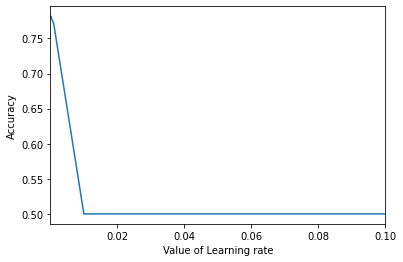

In [ ]:
plt.plot(lr_arr, acc_arr)
plt.xlim(0.00001, 0.1)
plt.xlabel('Value of Learning rate')
plt.ylabel('Accuracy')
print(lr_arr[np.argmax(acc_arr)])

0.0001


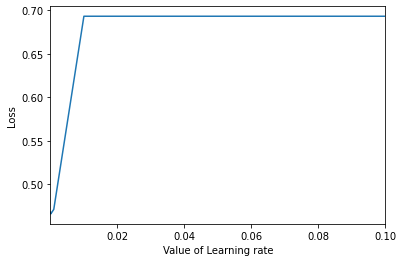

In [ ]:
plt.plot(lr_arr, loss_arr)
plt.xlim(0.00001,0.1)
plt.xlabel('Value of Learning rate')
plt.ylabel('Loss')
print(lr_arr[np.argmin(loss_arr)])

In [ ]:
adam_optimizer = Adam(learning_rate=lr_arr[np.argmax(acc_arr)])
model.compile(
        loss="binary_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"]
)

In [ ]:
#scores=model.evaluate(X_test,y_test)
acc_arr.append(0.5000)
loss_arr.append(0.6932)

In [ ]:

print(acc_arr)
print(loss_arr)

[0.7796000242233276, 0.7815999984741211, 0.7706000208854675, 0.5, 0.5]
[0.4677944779396057, 0.46577954292297363, 0.47098785638809204, 0.6932, 0.6932]




> Training 



In [ ]:
history=model.fit(
    x=X_train,
    y=y_train,
    epochs=30,
    verbose=1,
    batch_size=16,
    validation_data=(X_val, y_val)
    )

Epoch 1/30
2188/2188 [==============================] - 275s 125ms/step - loss: 0.5951 - accuracy: 0.6775 - val_loss: 0.5222 - val_accuracy: 0.7444
Epoch 2/30
2188/2188 [==============================] - 271s 124ms/step - loss: 0.5375 - accuracy: 0.7296 - val_loss: 0.5085 - val_accuracy: 0.7530
Epoch 3/30
2188/2188 [==============================] - 271s 124ms/step - loss: 0.5210 - accuracy: 0.7415 - val_loss: 0.5006 - val_accuracy: 0.7552
Epoch 4/30
2188/2188 [==============================] - 271s 124ms/step - loss: 0.5143 - accuracy: 0.7480 - val_loss: 0.4934 - val_accuracy: 0.7586
Epoch 5/30
2188/2188 [==============================] - 270s 124ms/step - loss: 0.5054 - accuracy: 0.7531 - val_loss: 0.4871 - val_accuracy: 0.7664
Epoch 6/30
2188/2188 [==============================] - 270s 123ms/step - loss: 0.5013 - accuracy: 0.7546 - val_loss: 0.4772 - val_accuracy: 0.7682
Epoch 7/30
2188/2188 [==============================] - 270s 124ms/step - loss: 0.4963 - accuracy: 0.7565 - val_

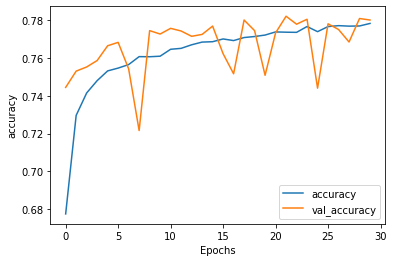

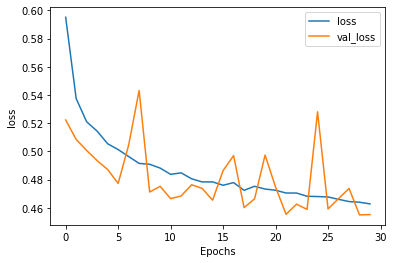

In [ ]:

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



> **Testing**



In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 67s 215ms/step - loss: 0.4596 - accuracy: 0.7831


[0.4595646858215332, 0.7831000089645386]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()



> Making prediction zeros and ones only



In [ ]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 0, ..., 0, 0, 1])



> Calculatations



Text(33.0, 0.5, 'Truth')

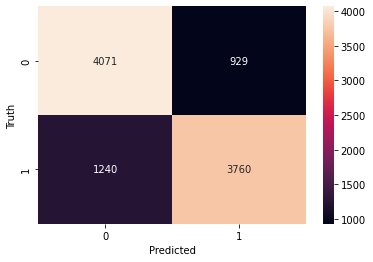

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Accuracy=  0.7831
Precision=  0.8018767327788441
Recall=  0.752
Fscore=  0.7761378883269687


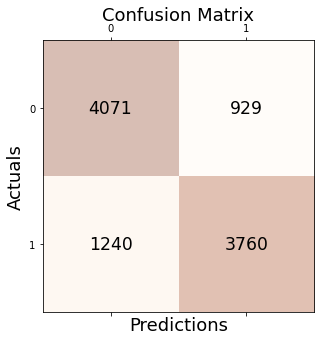

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def calcs(y_pred):
  pre=precision_score(y_test, y_pred)
  r=recall_score(y_test, y_pred)
  ac=accuracy_score(y_test, y_pred)
  f1=f1_score(y_test, y_pred)
  return ac,pre,r,f1
  
def printMat(mat):
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(mat, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(mat.shape[0]):
     for j in range(mat.shape[1]):
         ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

ac,prec,recall,fScore=calcs(y_predicted)
cm=confusion_matrix(y_test,y_predicted)
print("Accuracy= ",ac)
print("Precision= ",prec)
print("Recall= ",recall)
print("Fscore= ",fScore)
printMat(cm)